In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader.data import DataReader
import yfinance as yf
from pandas_datareader import data as pdr

yf.pdr_override()

# For time stamps
from datetime import datetime


# # The tech stocks we'll use for this analysis
# tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

# List of stocks in Berkshire Hathaway top 10
tech_list = ['AAPL', 'BAC', 'KO', 'AXP', 'MCO', 'KHC', 'VZ', 'USB', 'CVX', 'GM']

end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

for stock in tech_list:
    globals()[stock] = yf.download(stock, start, end)
    

# company_list = [AAPL, GOOG, MSFT, AMZN]
# company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON"]

company_list = [AAPL, BAC, KO, AXP, MCO, KHC, VZ, USB, CVX, GM]  
company_name = ["Apple Inc.", "Bank of America Corp.", "The Coca-Cola Company", "American Express Company", "Moody's Corporation", "Kraft Heinz Co", "Verizon Communications Inc.", "U.S. Bancorp", "Chevron Corporation", "General Motors Company"]


for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name
    
df = pd.concat(company_list, axis=0)
df.tail(10)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Open       High        Low      Close  Adj Close    Volume  \
Date                                                                          
2024-02-09  38.619999  38.980000  38.450001  38.560001  38.560001  13066000   
2024-02-12  38.540001  39.529999  38.509998  39.279999  39.279999  18113100   
2024-02-13  38.799999  38.939999  37.830002  38.310001  38.310001  18979000   
2024-02-14  38.580002  38.750000  38.049999  38.369999  38.369999  13278500   
2024-02-15  38.669998  39.509998  38.639999  38.990002  38.990002  15688600   
2024-02-16  38.799999  39.060001  38.619999  38.700001  38.700001  12392900   
2024-02-20  38.349998  39.169998  38.130001  39.009998  39.009998  16971300   
2024-02-21  38.959999  39.820000  38.959999  39.490002  39.490002  15987800   
2024-02-22  39.549999  39.799999  39.160000  39.340000  39.340000  11458100   
2024-02-23  39.360001  39.950001  39.320000  39.630001  39.630001  15192500   

                      company_name  
Date                                
2024-02-09  General Motors Company  
2024-02-12  General Motors Company  
2024-02-13  General Motors Company  
2024-02-14  General Motors Company  
2024-02-15  General Motors Company  
2024-02-16  General Motors Company  
2024-02-20  General Motors Company  
2024-02-21  General Motors Company  
2024-02-22  General Motors Company  
2024-02-23  General Motors Company

In [3]:
AAPL.describe()

Open        High         Low       Close   Adj Close  \
count  250.000000  250.000000  250.000000  250.000000  250.000000   
mean   178.831561  180.324120  177.530520  179.041440  178.503573   
std     12.301021   12.110054   12.214101   12.138579   12.279300   
min    144.380005  146.710007  143.899994  145.309998  144.538498   
25%    172.080002  173.640003  170.939995  172.442497  171.906830   
50%    180.020004  181.380005  177.994995  179.945000  179.358101   
75%    189.312500  189.990005  187.737499  189.352497  188.939705   
max    198.020004  199.619995  197.000000  198.110001  197.857529   

             Volume  
count  2.500000e+02  
mean   5.686772e+07  
std    1.595187e+07  
min    2.404830e+07  
25%    4.678172e+07  
50%    5.304980e+07  
75%    6.221395e+07  
max    1.282567e+08

In [4]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 250 entries, 2023-02-27 to 2024-02-23
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          250 non-null    float64
 1   High          250 non-null    float64
 2   Low           250 non-null    float64
 3   Close         250 non-null    float64
 4   Adj Close     250 non-null    float64
 5   Volume        250 non-null    int64  
 6   company_name  250 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 15.6+ KB


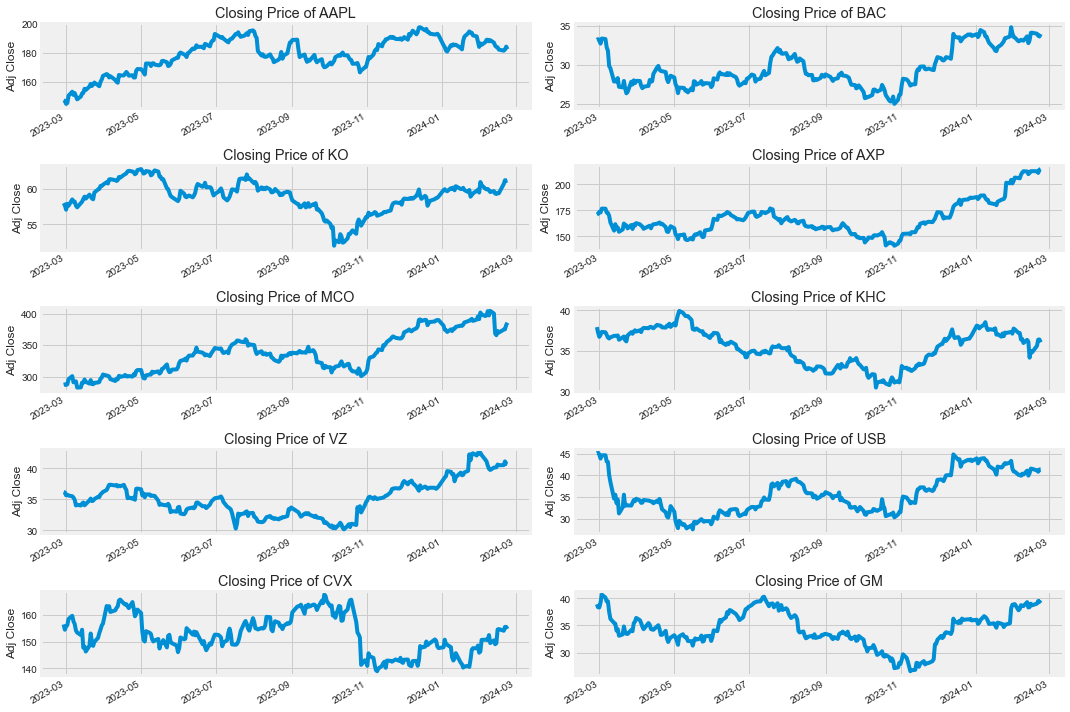

In [5]:
# Let's see a historical view of the closing price
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(5, 2, i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {tech_list[i - 1]}")
    
plt.tight_layout()

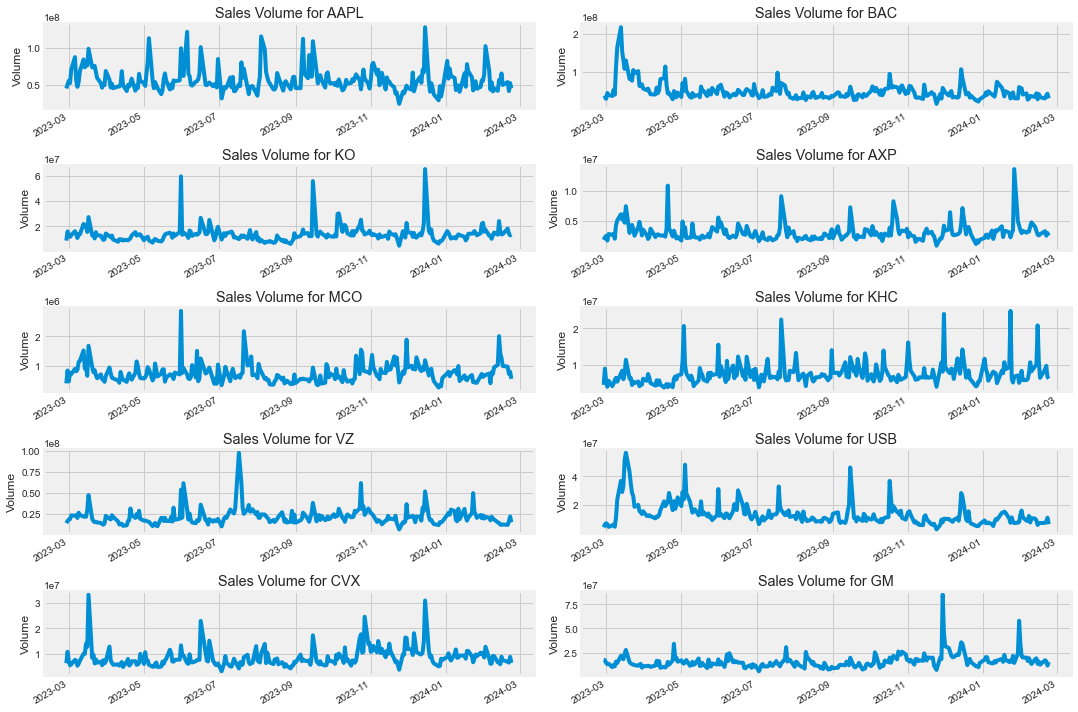

In [6]:
# Now let's plot the total volume of stock being traded each day
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(5, 2, i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Sales Volume for {tech_list[i - 1]}")
    
plt.tight_layout()

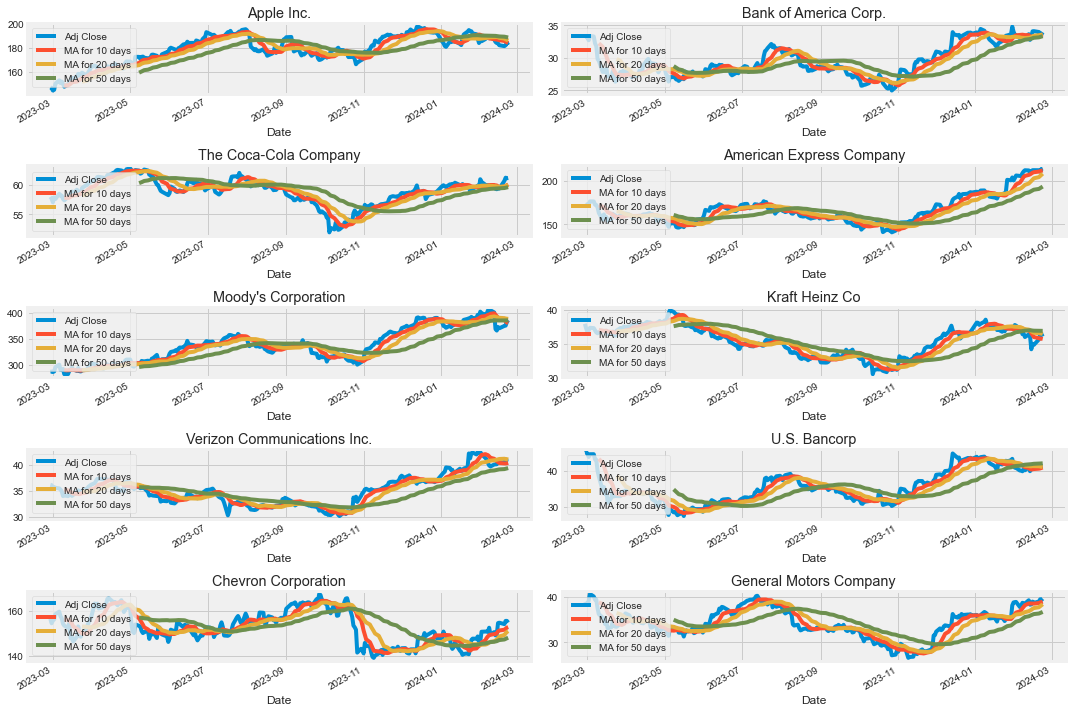

In [7]:
ma_day = [10, 20, 50]

for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()
        

fig, axes = plt.subplots(nrows=5, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

# Plotting for each company
for company, name, ax in zip(company_list, company_name, axes.flatten()):
    company[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=ax)
    ax.set_title(name)

fig.tight_layout()

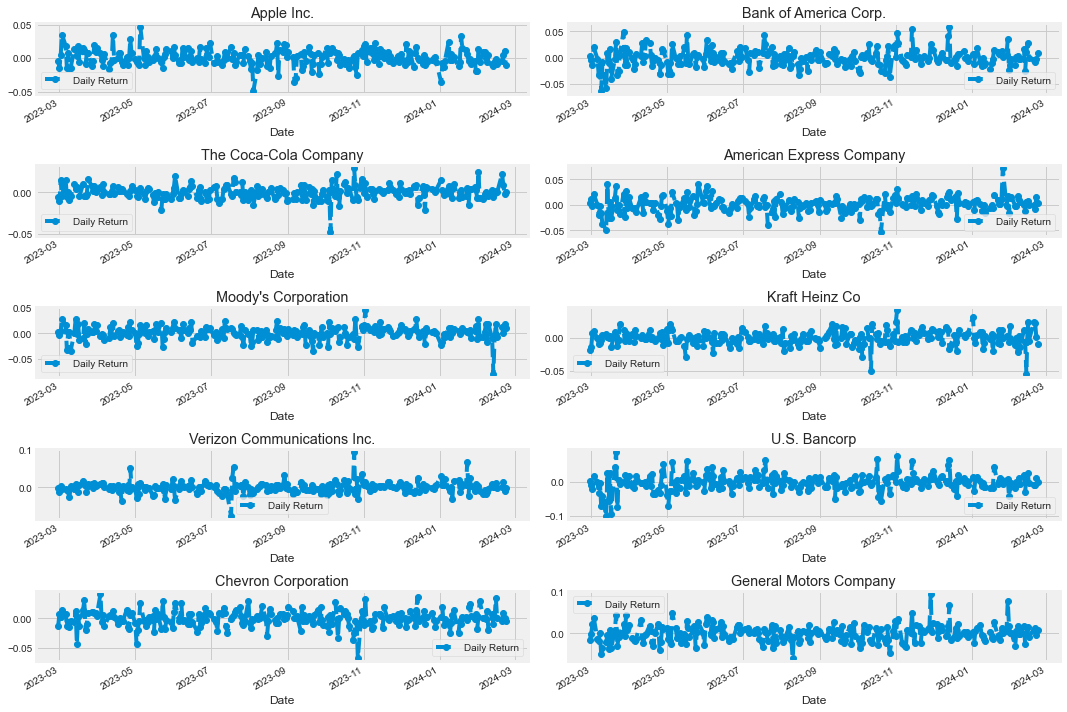

In [8]:
# We'll use pct_change to find the percent change for each day
for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()

# Then we'll plot the daily return percentage
fig, axes = plt.subplots(nrows=5, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

# Plotting for each company
for company, name, ax in zip(company_list, company_name, axes.flatten()):
    company['Daily Return'].plot(ax=ax, legend=True, linestyle='--', marker='o')
    ax.set_title(name)

fig.tight_layout()

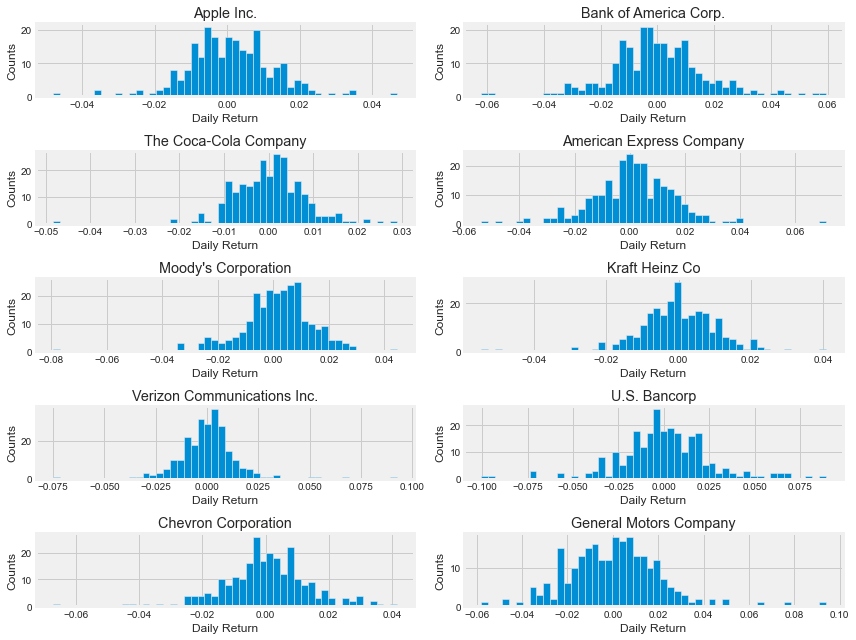

In [9]:
plt.figure(figsize=(12, 9))

for i, company in enumerate(company_list, 1):
    plt.subplot(5, 2, i)
    company['Daily Return'].hist(bins=50)
    plt.xlabel('Daily Return')
    plt.ylabel('Counts')
    plt.title(f'{company_name[i - 1]}')
    
plt.tight_layout()

In [10]:
# Grab all the closing prices for the tech stock list into one DataFrame

closing_df = pdr.get_data_yahoo(tech_list, start=start, end=end)['Adj Close']

# Make a new tech returns DataFrame
tech_rets = closing_df.pct_change()
tech_rets.head()

[*********************100%%**********************]  10 of 10 completed


Ticker          AAPL       AXP       BAC       CVX        GM       KHC  \
Date                                                                     
2023-02-27       NaN       NaN       NaN       NaN       NaN       NaN   
2023-02-28 -0.003448  0.003982  0.002631 -0.012591 -0.014500 -0.018154   
2023-03-01 -0.014246  0.011035 -0.004665  0.007962 -0.000516 -0.013867   
2023-03-02  0.004129 -0.003240 -0.012677  0.003147  0.023298  0.006771   
2023-03-03  0.035090  0.021387  0.020006  0.014764  0.037440  0.009829   

Ticker            KO       MCO       USB        VZ  
Date                                                
2023-02-27       NaN       NaN       NaN       NaN  
2023-02-28 -0.005182  0.001519  0.003153 -0.001800  
2023-03-01 -0.010923 -0.002998 -0.008799 -0.013141  
2023-03-02  0.014611  0.003664 -0.021137  0.002872  
2023-03-03 -0.004689  0.028518  0.017275 -0.003905

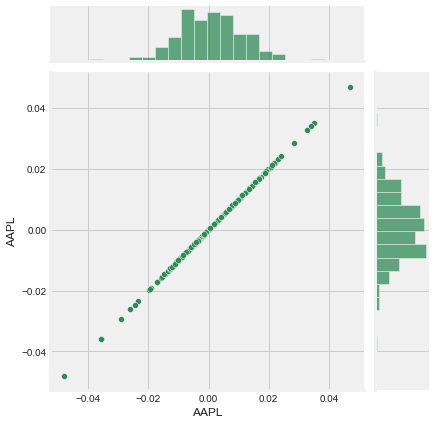

In [11]:
# Comparing Google to itself should show a perfectly linear relationship
sns.jointplot(x='AAPL', y='AAPL', data=tech_rets, kind='scatter', color='seagreen')

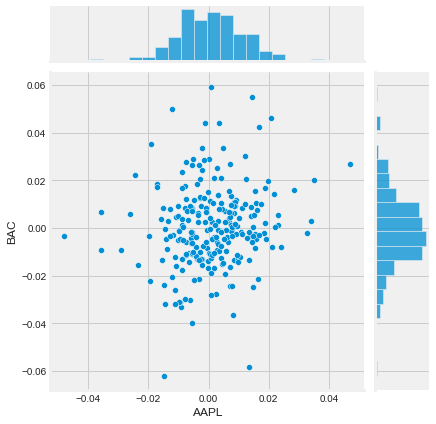

In [12]:
# We'll use joinplot to compare the daily returns of Google and Microsoft
sns.jointplot(x='AAPL', y='BAC', data=tech_rets, kind='scatter')

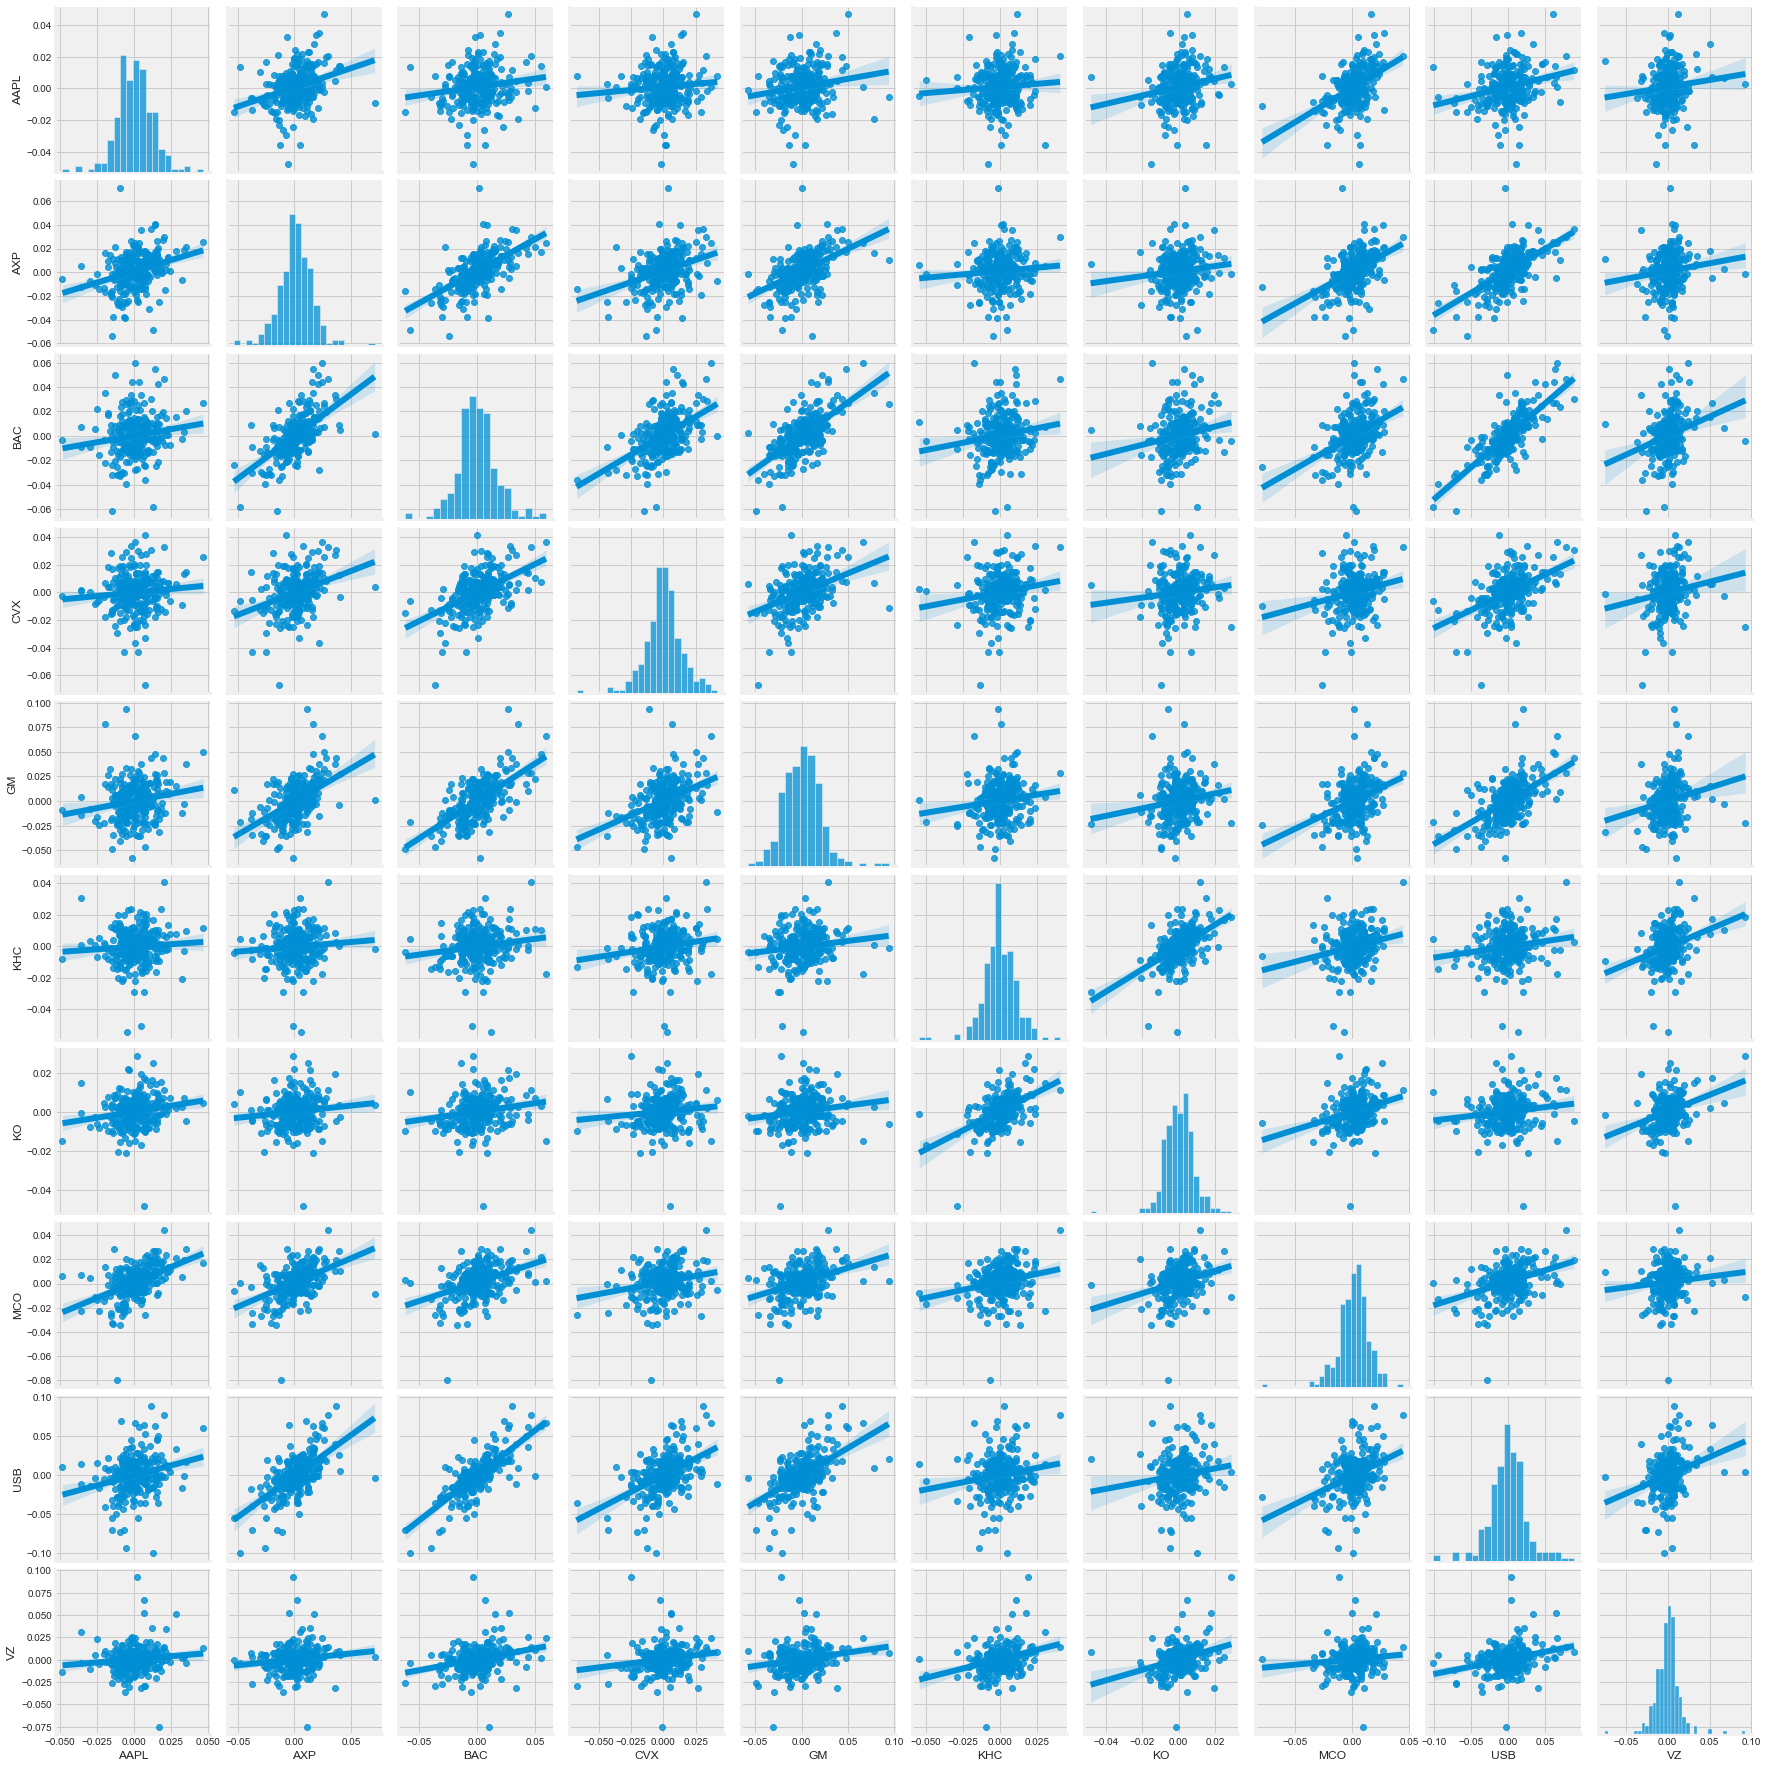

In [13]:
# We can simply call pairplot on our DataFrame for an automatic visual analysis 
# of all the comparisons

sns.pairplot(tech_rets, kind='reg')

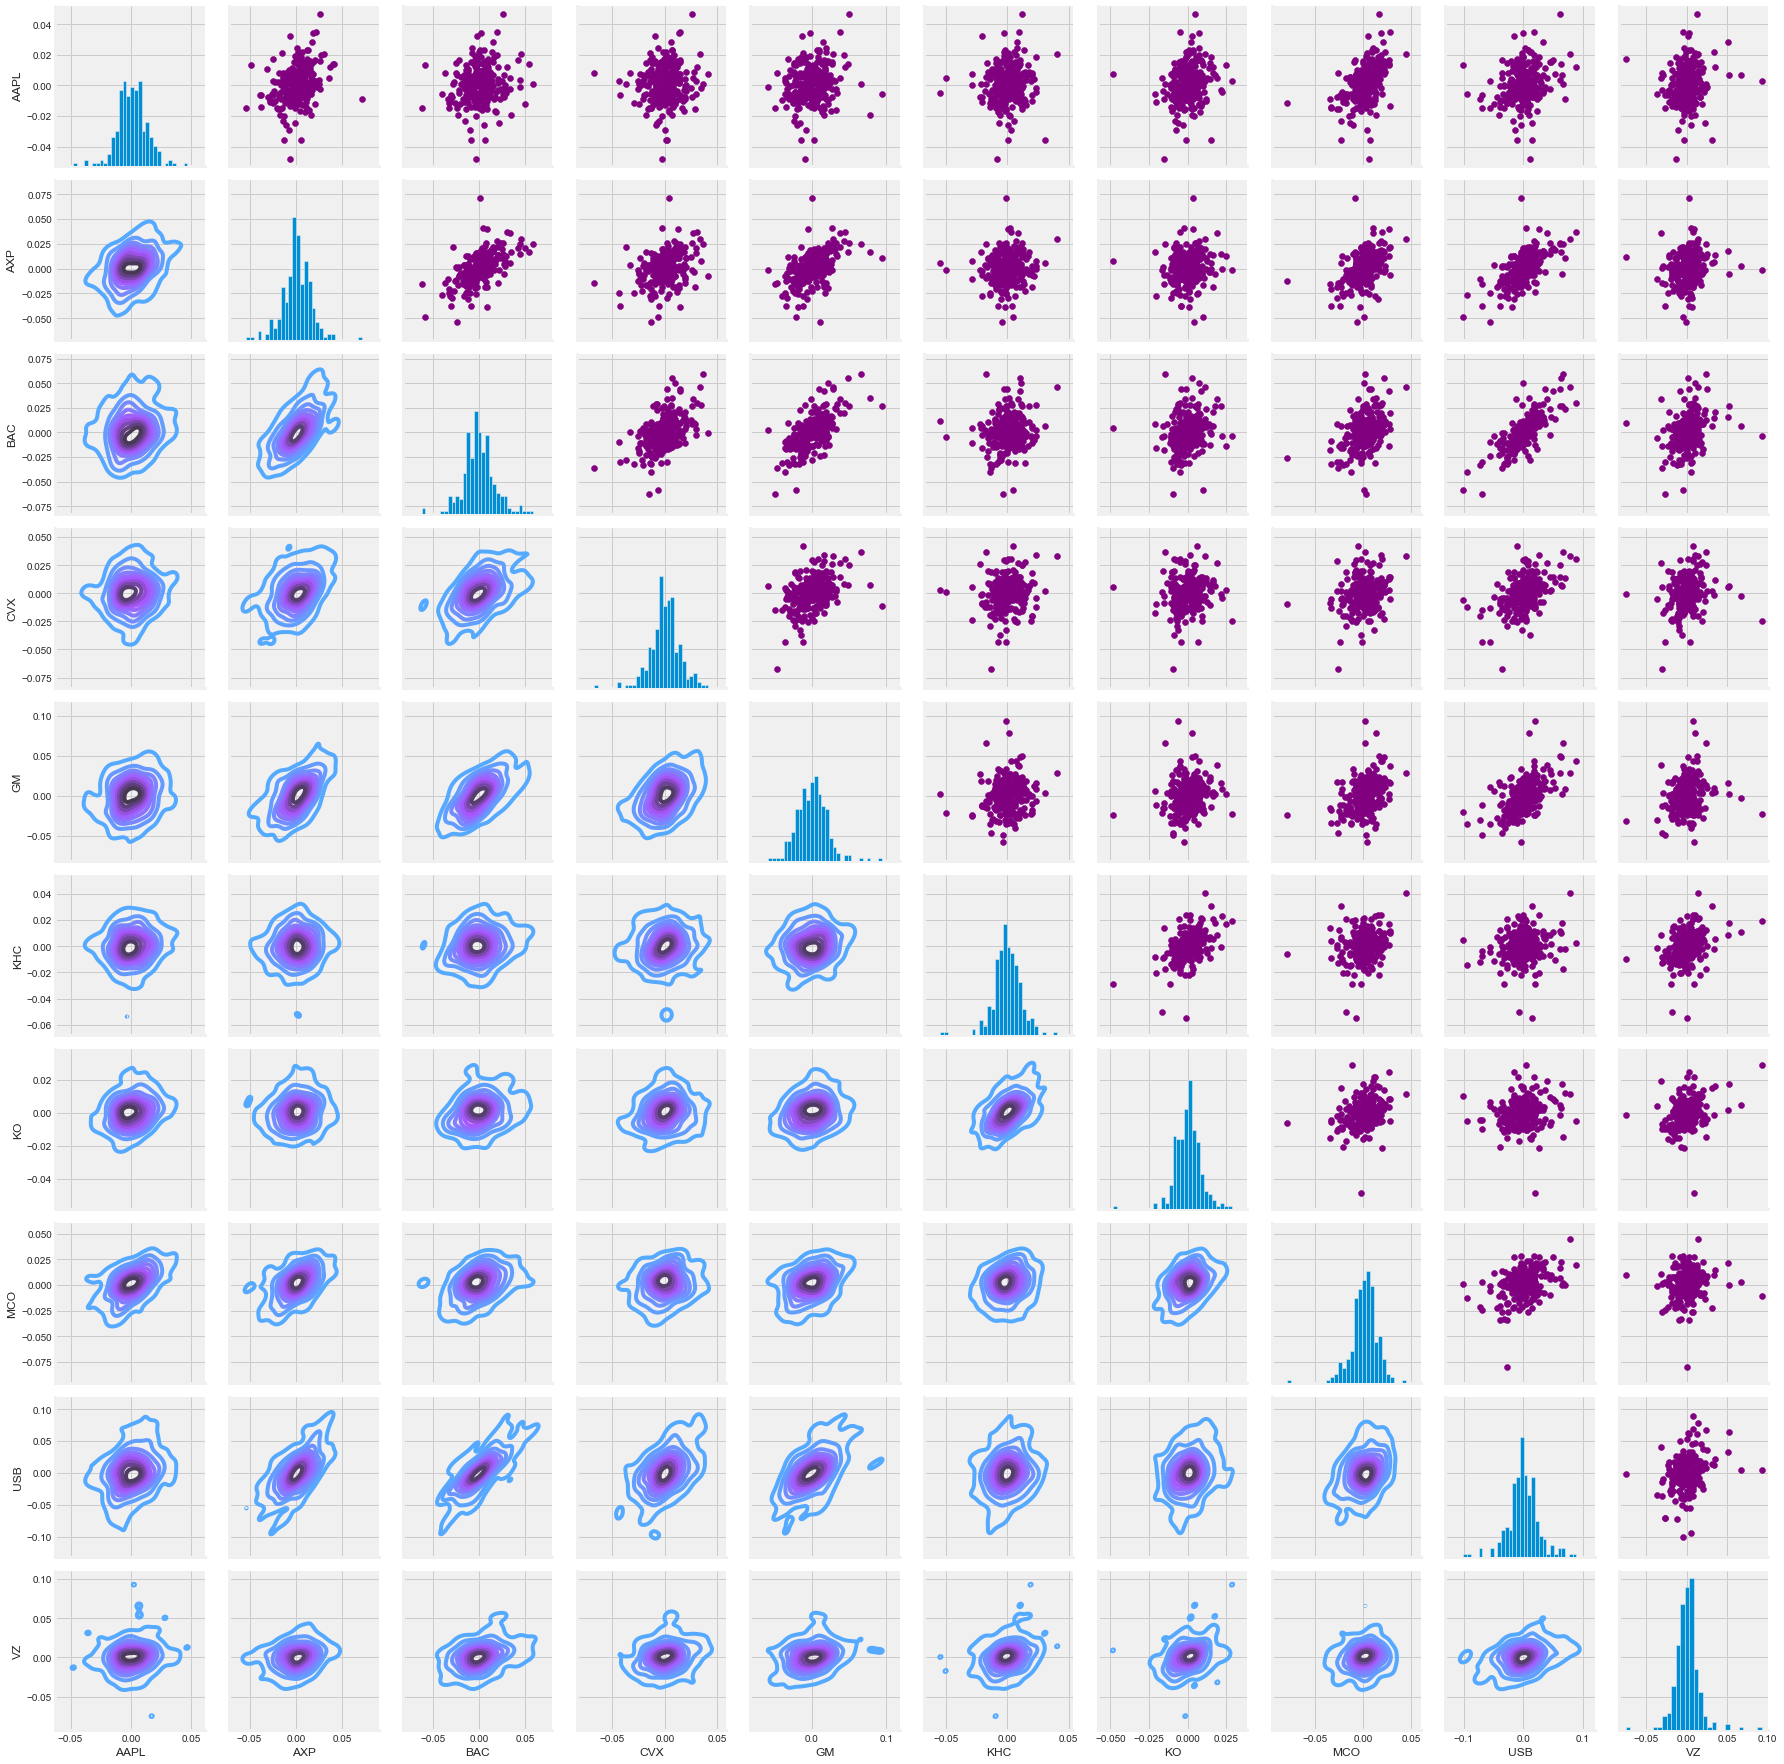

In [14]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
return_fig = sns.PairGrid(tech_rets.dropna())

# Using map_upper we can specify what the upper triangle will look like.
return_fig.map_upper(plt.scatter, color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) 
# or the color map (BluePurple)
return_fig.map_lower(sns.kdeplot, cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
return_fig.map_diag(plt.hist, bins=30)

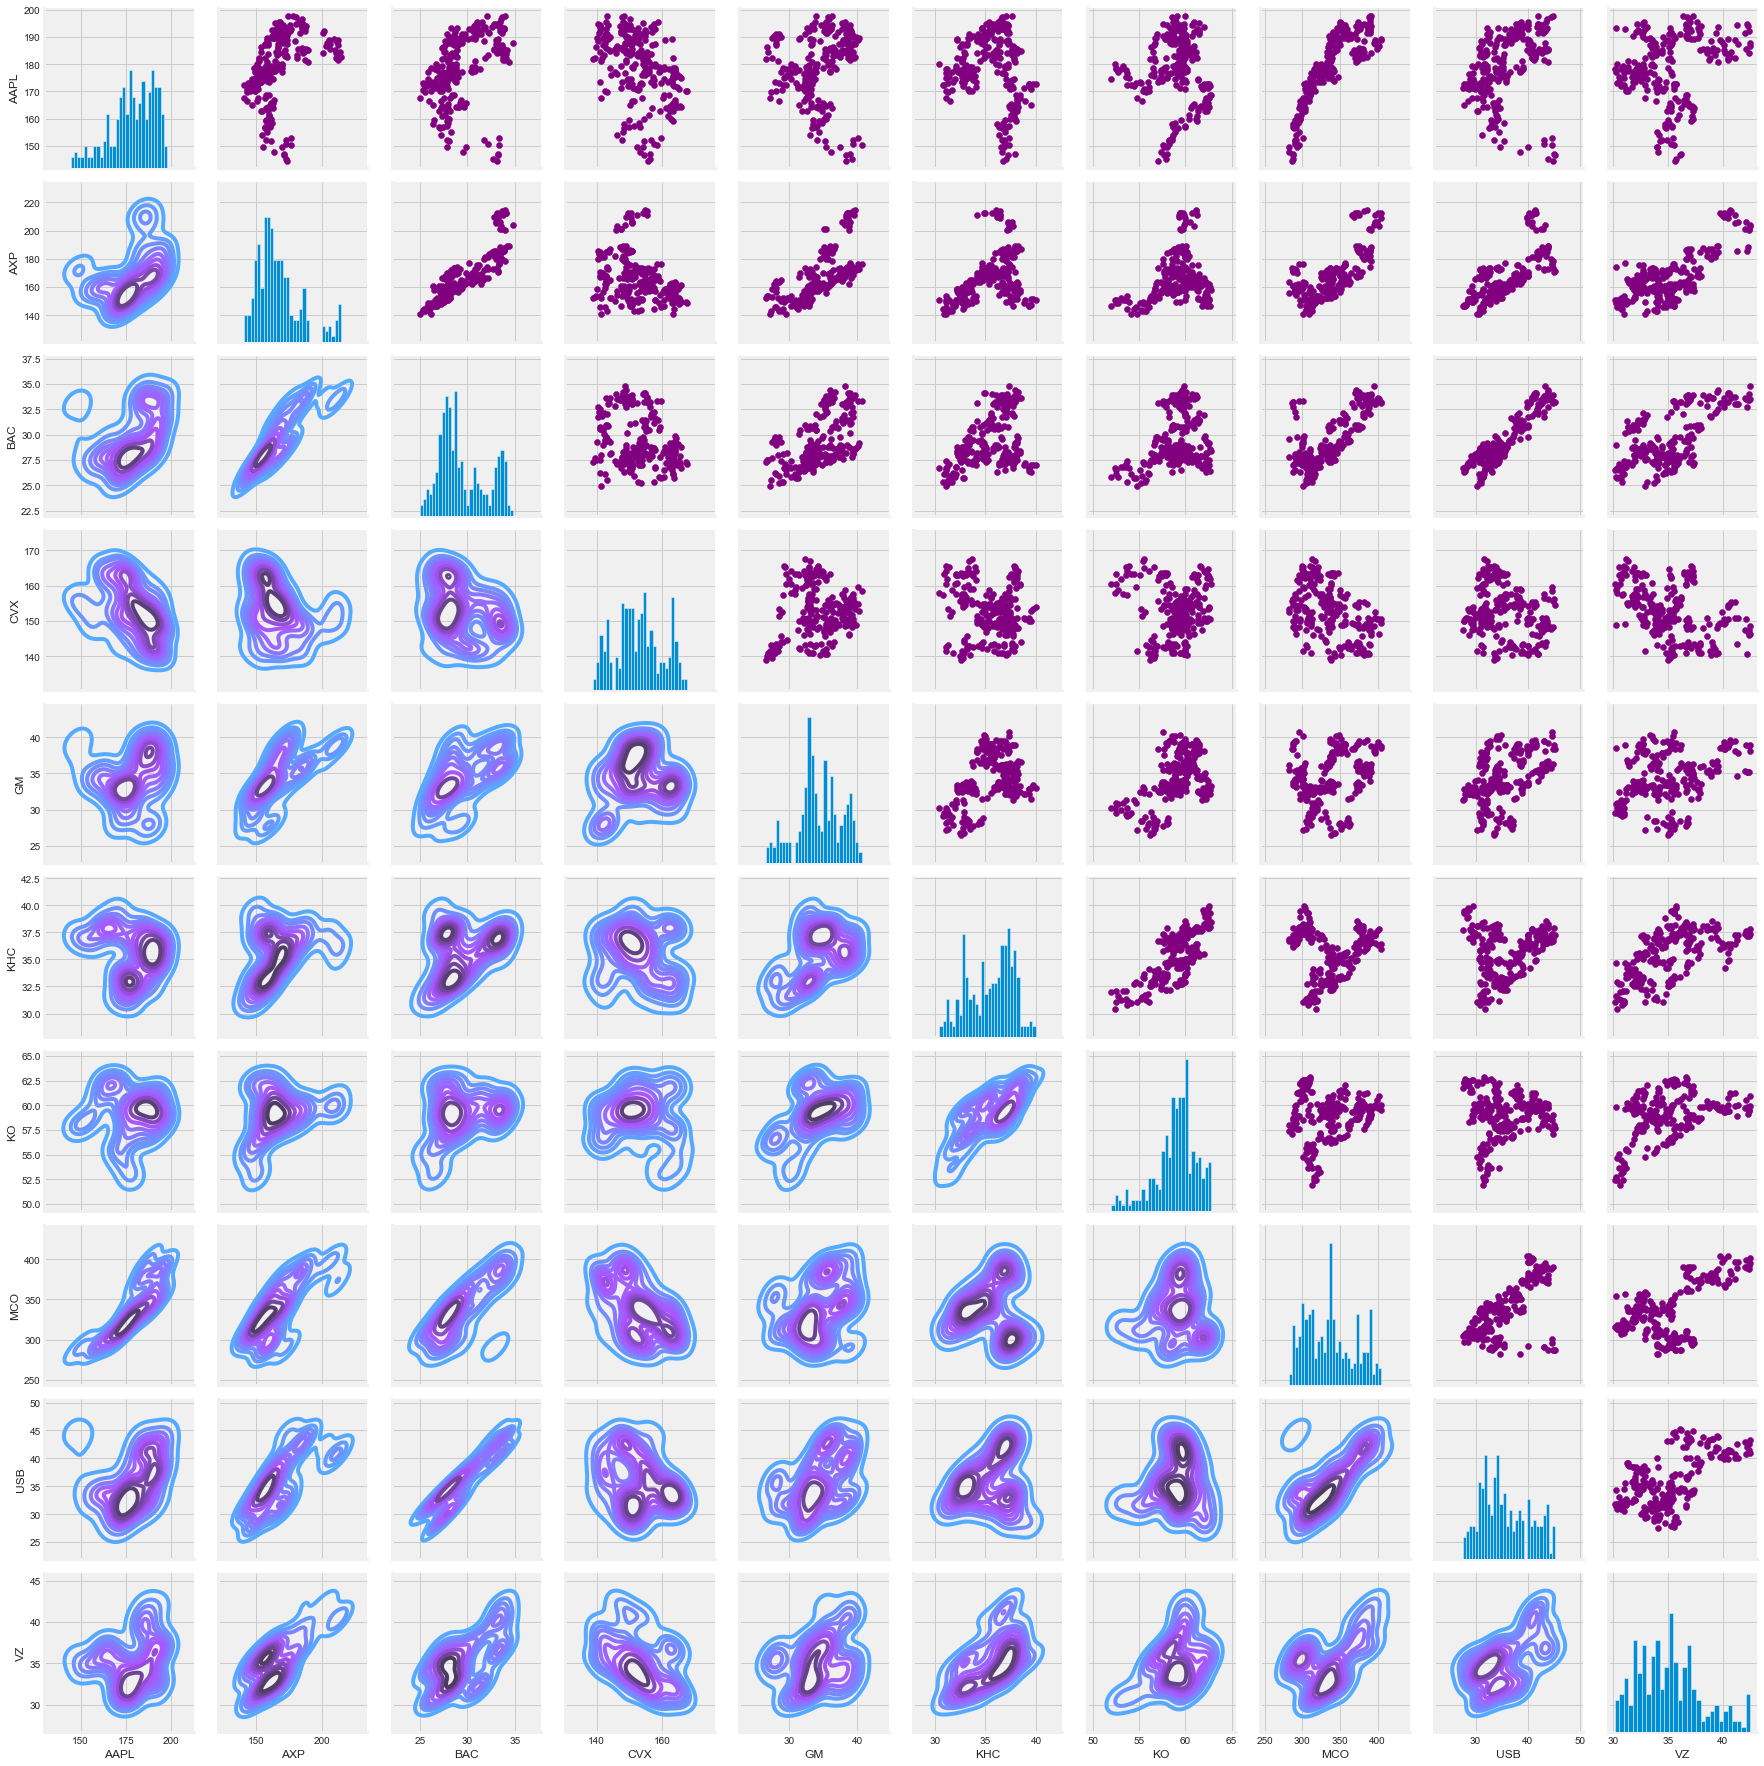

In [15]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
returns_fig = sns.PairGrid(closing_df)

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) or the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
returns_fig.map_diag(plt.hist,bins=30)

Text(0.5, 1.0, 'Correlation of stock closing price')

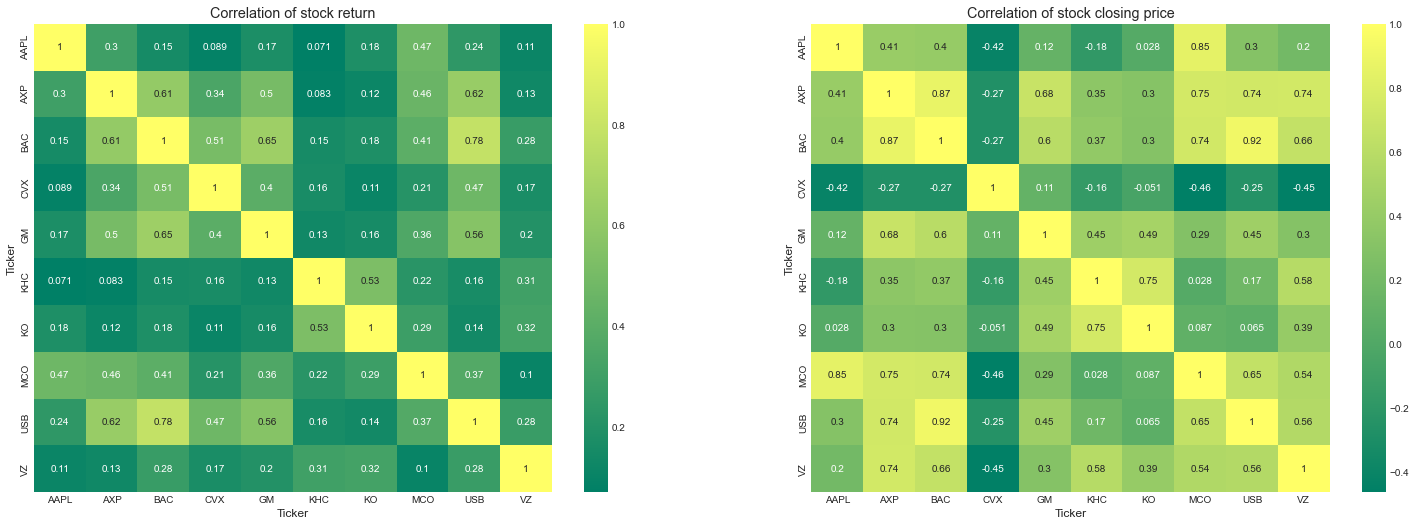

In [16]:
plt.figure(figsize=(60, 50))

plt.subplot(5, 5, 1)
sns.heatmap(tech_rets.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock return')

plt.subplot(5, 5, 2)
sns.heatmap(closing_df.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock closing price')

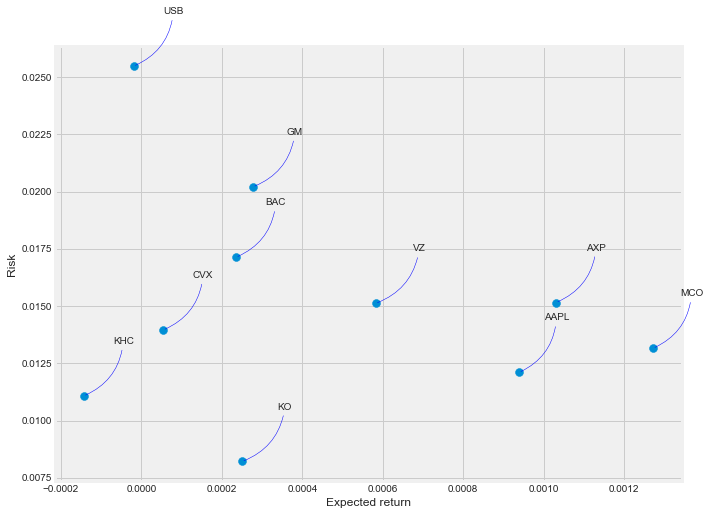

In [17]:
rets = tech_rets.dropna()

area = np.pi * 20

plt.figure(figsize=(10, 8))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom', 
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))

In [18]:
# Get the stock quote
df = pdr.get_data_yahoo('NVDA', start='2012-01-01', end=datetime.now())
# Show teh data
df

[*********************100%%**********************]  1 of 1 completed


Open        High         Low       Close   Adj Close  \
Date                                                                     
2012-01-03    3.575000    3.600000    3.502500    3.510000    3.219882   
2012-01-04    3.512500    3.565000    3.480000    3.550000    3.256576   
2012-01-05    3.532500    3.695000    3.517500    3.677500    3.373536   
2012-01-06    3.675000    3.677500    3.592500    3.635000    3.334550   
2012-01-09    3.637500    3.705000    3.610000    3.635000    3.334550   
...                ...         ...         ...         ...         ...   
2024-02-16  741.000000  744.020020  725.010010  726.130005  726.130005   
2024-02-20  719.469971  719.559998  677.340027  694.520020  694.520020   
2024-02-21  680.059998  688.880005  662.479980  674.719971  674.719971   
2024-02-22  750.250000  785.750000  742.200012  785.380005  785.380005   
2024-02-23  807.900024  823.940002  775.700012  788.169983  788.169983   

              Volume  
Date                  
2012-01-03  46804400  
2012-01-04  34737200  
2012-01-05  56354800  
2012-01-06  53325200  
2012-01-09  50824400  
...              ...  
2024-02-16  49391800  
2024-02-20  70483300  
2024-02-21  69029800  
2024-02-22  86510000  
2024-02-23  82711200  

[3055 rows x 6 columns]

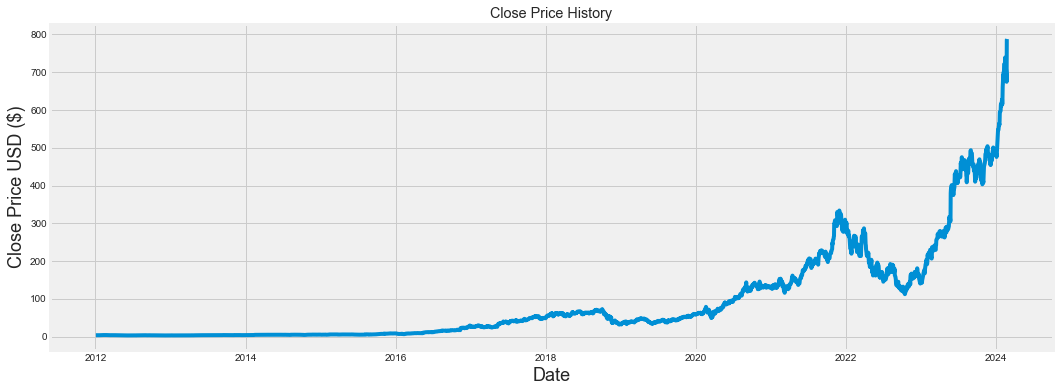

In [19]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [20]:
# Create a new dataframe with only the 'Close column 
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

2903

In [21]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[8.46783149e-04],
       [8.97717428e-04],
       [1.06007067e-03],
       ...,
       [8.55537498e-01],
       [9.96447359e-01],
       [1.00000000e+00]])

In [22]:
# Create the training data set 
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.00084678, 0.00089772, 0.00106007, 0.00100595, 0.00100595,
       0.00098685, 0.00089453, 0.00086588, 0.0007481 , 0.00068125,
       0.00082768, 0.00094547, 0.00090408, 0.00102824, 0.00113329,
       0.00110464, 0.00106007, 0.00112374, 0.00108872, 0.00107917,
       0.00113011, 0.00130838, 0.00141343, 0.00137523, 0.00138796,
       0.00156941, 0.00156623, 0.00143889, 0.00151848, 0.00154713,
       0.00152485, 0.00161398, 0.00142298, 0.00144845, 0.00141343,
       0.00144208, 0.00140388, 0.00130201, 0.00125744, 0.00120014,
       0.00123197, 0.00127336, 0.00110782, 0.00106325, 0.0010919 ,
       0.00110782, 0.00109509, 0.00102187, 0.00108554, 0.00095184,
       0.00101869, 0.00102505, 0.00103779, 0.00096139, 0.00098049,
       0.00097412, 0.00100914, 0.00106325, 0.00109509, 0.00120332])]
[0.0012256070772347126]

[array([0.00084678, 0.00089772, 0.00106007, 0.00100595, 0.00100595,
       0.00098685, 0.00089453, 0.00086588, 0.0007481 , 0.00068125,
       0.00082768, 0.00094547, 0.

In [23]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, LSTM

print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [24]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=5)

Epoch 1/5
2843/2843 [==============================] - 44s 8ms/step - loss: 3.2414e-04
Epoch 2/5
2843/2843 [==============================] - 24s 9ms/step - loss: 1.6100e-04
Epoch 3/5
2843/2843 [==============================] - 24s 9ms/step - loss: 1.3697e-04
Epoch 4/5
2843/2843 [==============================] - 24s 9ms/step - loss: 8.9240e-05
Epoch 5/5
2843/2843 [==============================] - 24s 8ms/step - loss: 9.2026e-05


In [25]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

5/5 [==============================] - 0s 5ms/step


17.223298576325664

C:\Users\Vishnu\AppData\Local\Temp\ipykernel_9188\2388977846.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


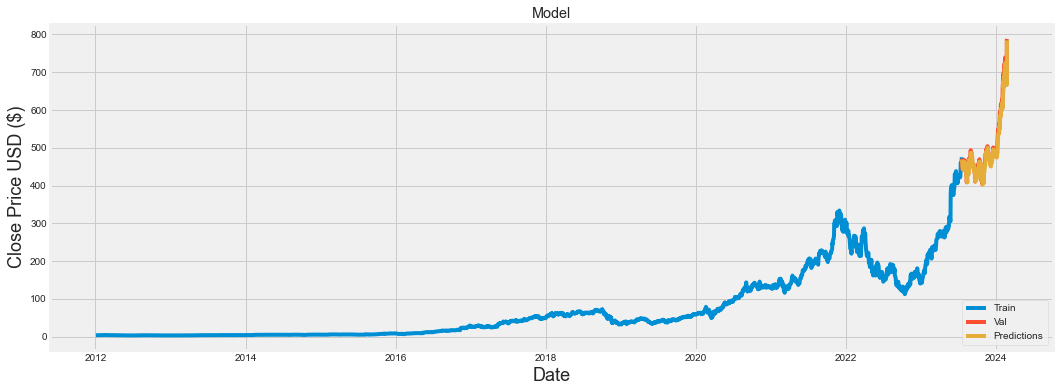

In [26]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()